In [42]:
# Importing libraries
import os, sys
import numpy as np
import pandas as pd
import librosa
import IPython.display as ipd
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
# librosa

In [3]:
# for root, dirs, files in os.walk("../artifacts/data/genres_original", topdown=False):
#         print("First loop entered")
#         for file in files:
#             print(file)
#             if file.endswith('.wav'):
#                 print('lol')
#                 audio_path = os.path.join(root, file)
#                 res = file.split('.', 1)
#                 res = res[0]
#                 print(res)
#                 print('update')

In [2]:
# Data Ingestion
audio_paths = []
audio_labels = []

dirname = "../artifacts/data/genres_original"
total_files = sum([len(files) for _, _, files in os.walk(dirname, topdown=False)])
print(total_files)

with tqdm(total=total_files) as pbar:
    for root, dirs, files in os.walk(dirname, topdown=False):
        for file in files:
            if file.endswith('.wav'):
                audio_path = os.path.join(root, file)
                res = file.split('.', 1)
                res = res[0]
                audio_paths.append(audio_path)
                audio_labels.append(res)
                pbar.update()


audio_paths = np.array(audio_paths)
audio_labels = np.array(audio_labels)

1000


100%|██████████| 1000/1000 [00:00<00:00, 181281.24it/s]


In [6]:
# example working of os.walk()
# dirname = "../artifacts/data/genres_original"

# for a, b, c in (os.walk(dirname, topdown=False)):
#     print(a)
#     print(b)
#     print(c)

#     break
'''
    Rin this cell to check example working of os.walk()
'''

'\n    Rin this cell to check example working of os.walk()\n'

In [8]:
# Features used for our audio file
'''

Spectrogram
Mel-Spectrogram
MFCC
Zero-crossing rate
Spectral centroids
Chromagrams


'''

'\n\nSpectrogram\nMel-Spectrogram\nMFCC\nZero-crossing rate\nSpectral centroids\nChromagrams\n\n\n'

In [5]:
# Audio Sample Analysis
def print_audio_data(file_path):
    audio_data, sample_rate = librosa.load(file_path)
    print(f"Audio Data : {audio_data}")
    print(f"Sample Rate : {sample_rate}")
    print(f"Length of audio : {len(audio_data)/sample_rate}")

    return (
        audio_data,
        sample_rate
    )

audio_data, sample_rate = print_audio_data("../artifacts/data/genres_original/blues/blues.00023.wav")

Audio Data : [ 0.17184448  0.20730591  0.08227539 ...  0.00271606 -0.02062988
 -0.01370239]
Sample Rate : 22050
Length of audio : 30.013333333333332


In [6]:
trim_audio, _ = librosa.effects.trim(audio_data)
print(f"Meaningful Audio : {trim_audio}")

Meaningful Audio : [ 0.17184448  0.20730591  0.08227539 ...  0.00271606 -0.02062988
 -0.01370239]


Text(0.5, 1.0, 'Example Sound Waves on Blues')

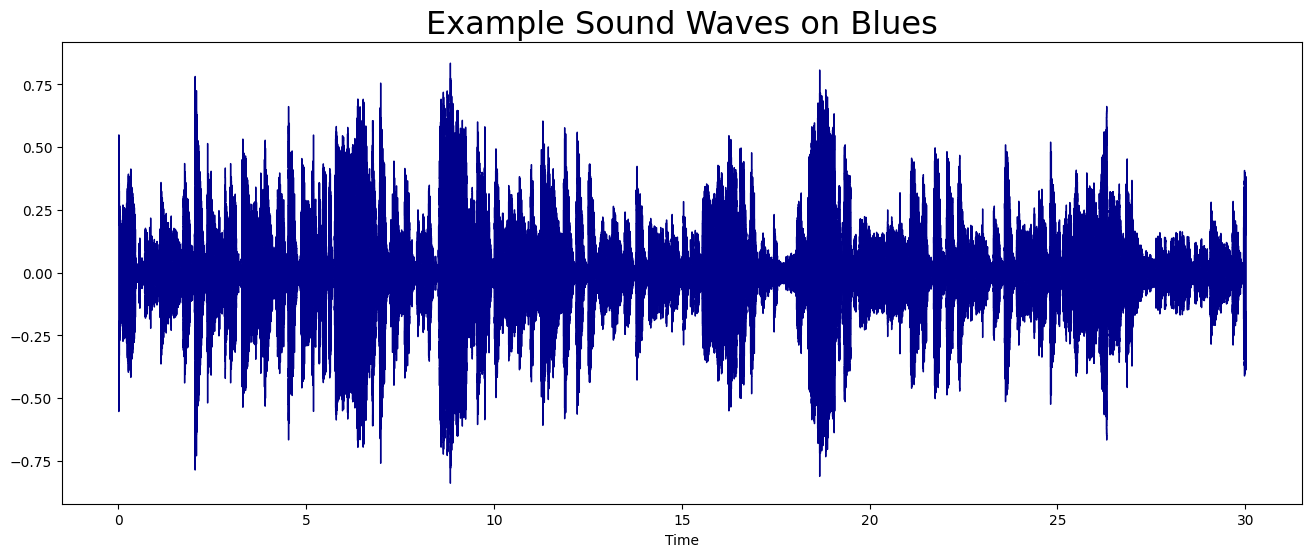

In [7]:
# EDA
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y = trim_audio, sr = sample_rate, color = "#00008B")
plt.title("Example Sound Waves on Blues", fontsize = 23)

 ...]

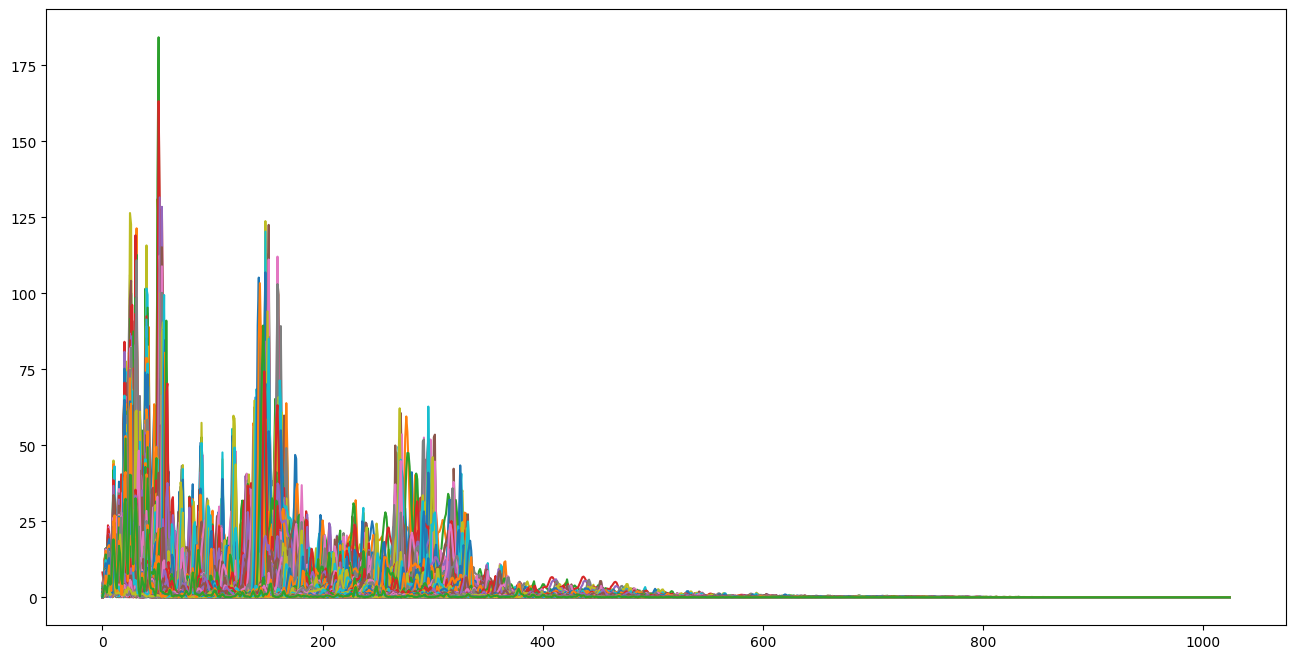

In [10]:
# Short Term Fourier Transform
fft = 2048
hl = 512

stft = np.abs(librosa.stft(audio_data, n_fft = fft, hop_length = hl))
plt.figure(figsize = (16, 8))
plt.plot(stft)

Text(0.5, 1.0, 'Spectrogram for Blues')

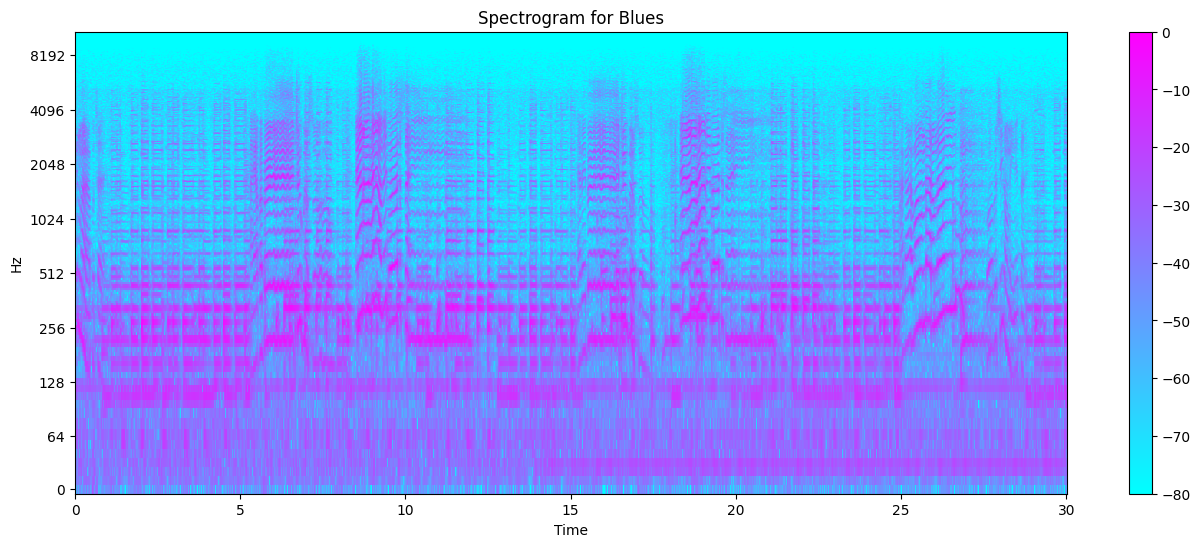

In [13]:
# Spectrogram
db = librosa.amplitude_to_db(stft, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(db, sr = sample_rate, hop_length = hl, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar()
plt.title("Spectrogram for Blues")

Text(0.5, 1.0, 'Blues Mel Spectrogram')

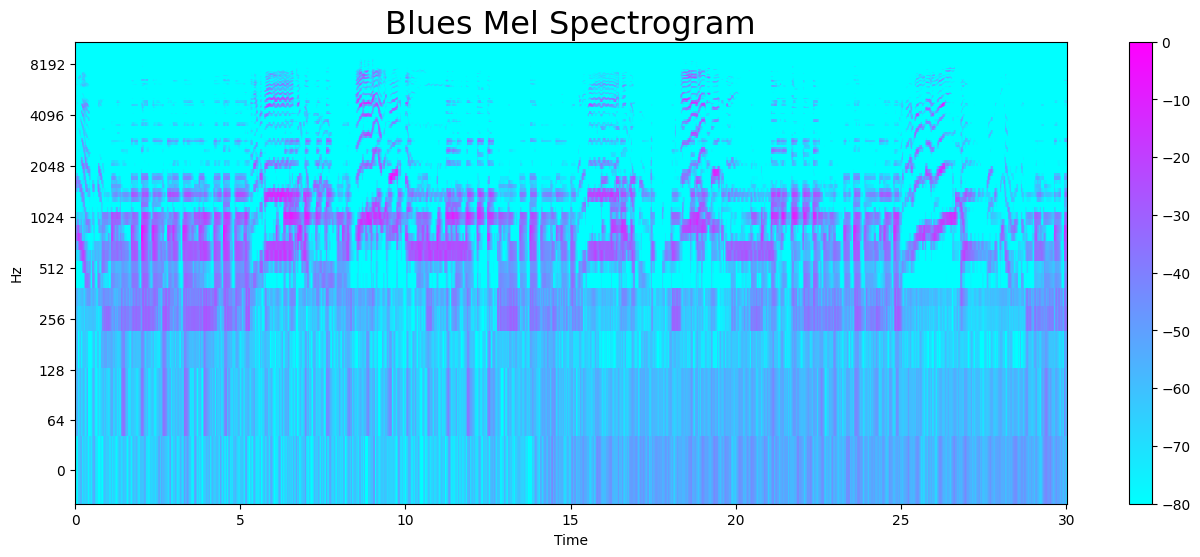

In [17]:
spectrogram = librosa.feature.melspectrogram(y=trim_audio, sr=sample_rate)
S_DB = librosa.amplitude_to_db(spectrogram, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hl, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar()
plt.title("Blues Mel Spectrogram", fontsize = 23)

In [18]:
audio_classical, sample_rate_classical = print_audio_data("../artifacts/data/genres_original/classical/classical.00007.wav")

Audio Data : [-0.06890869 -0.10128784 -0.07559204 ...  0.17019653  0.18179321
  0.16390991]
Sample Rate : 22050
Length of audio : 30.013333333333332


In [19]:
audio_classical, _ = librosa.effects.trim(audio_classical)

Text(0.5, 1.0, 'Classical Mel Spectrogram')

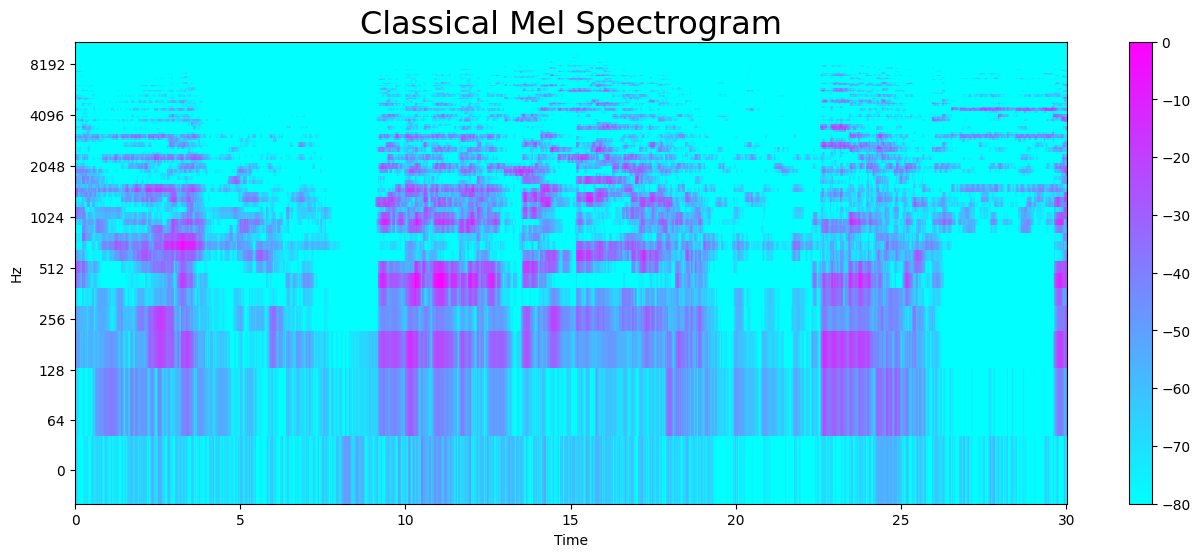

In [20]:
spectrogram = librosa.feature.melspectrogram(y=audio_classical, sr=sample_rate_classical)
S_DB = librosa.amplitude_to_db(spectrogram, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sample_rate_classical, hop_length=hl, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar()
plt.title("Classical Mel Spectrogram", fontsize = 23)

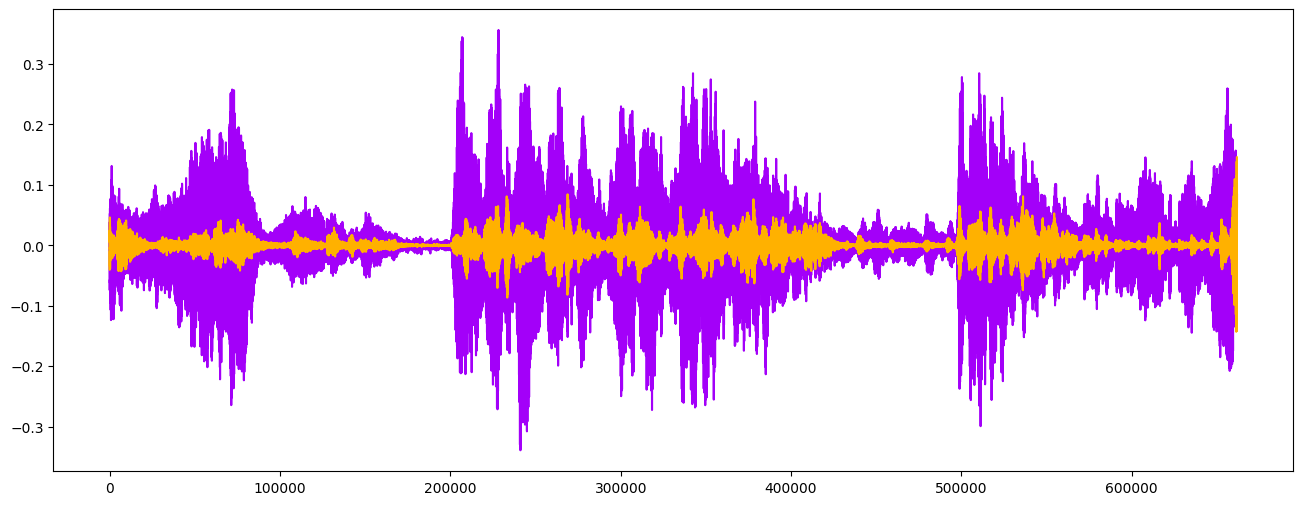

In [21]:
# Harmonics and Perceptrual
y_harm, y_perc = librosa.effects.hpss(audio_classical)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

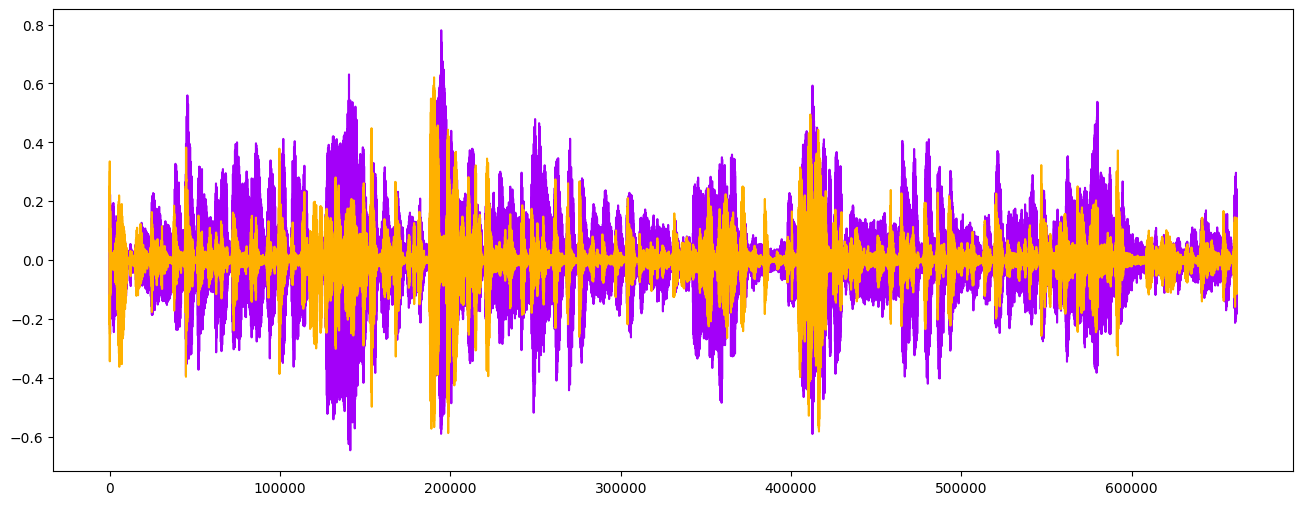

In [23]:
y_harm, y_perc = librosa.effects.hpss(trim_audio)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

In [30]:
spectral_centroids = librosa.feature.spectral_centroid(y=trim_audio, sr=sample_rate)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1445.25434511 1363.15233037 1272.39183755 ...  937.47853521  928.49295186
  913.51640189] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


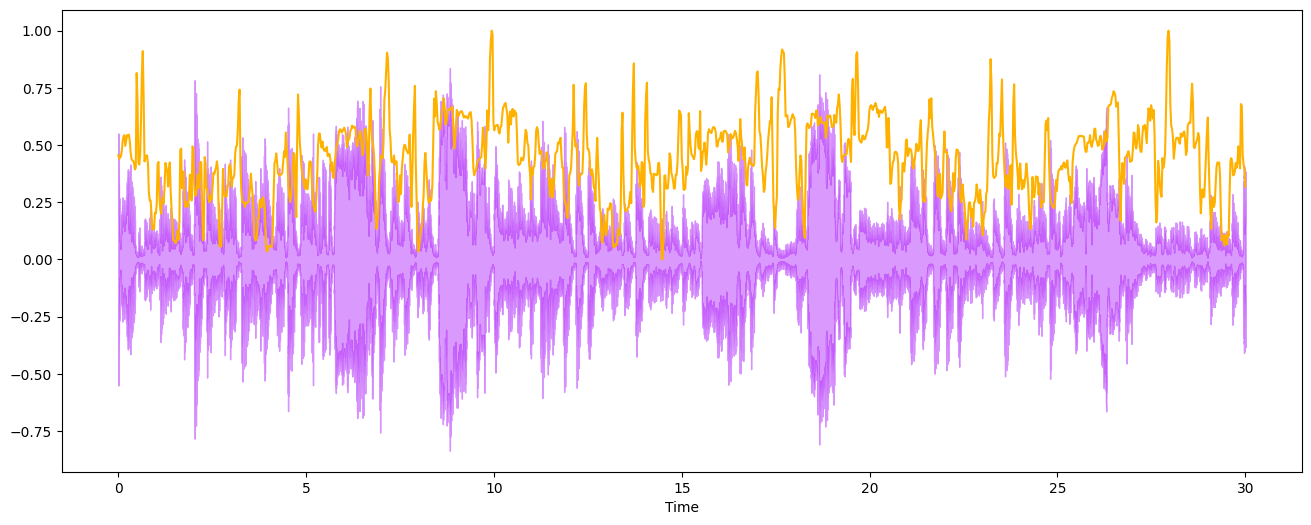

In [31]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=trim_audio, sr=sample_rate)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=trim_audio, sr=sample_rate, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

mfccs shape: (20, 1293)


a:\M\Hosted Projects\GTZAN Music Genre Classification\venv\lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
a:\M\Hosted Projects\GTZAN Music Genre Classification\venv\lib\site-packages\sklearn\preprocessing\_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


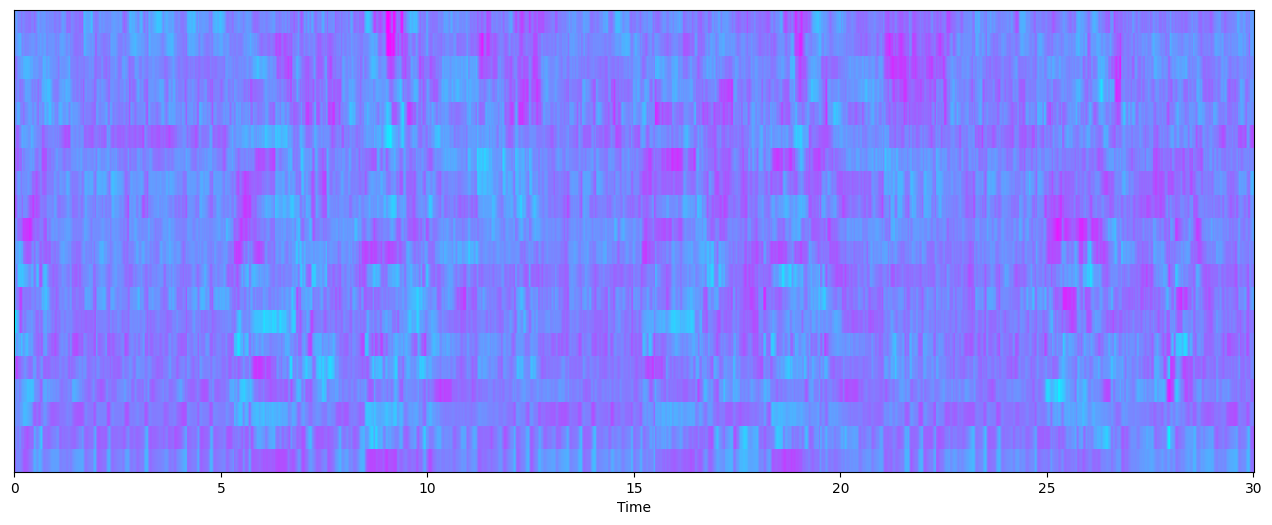

In [34]:
mfccs = librosa.feature.mfcc(y=trim_audio, sr=sample_rate)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sample_rate , x_axis='time', cmap = 'cool');

Chromogram shape: (12, 95)


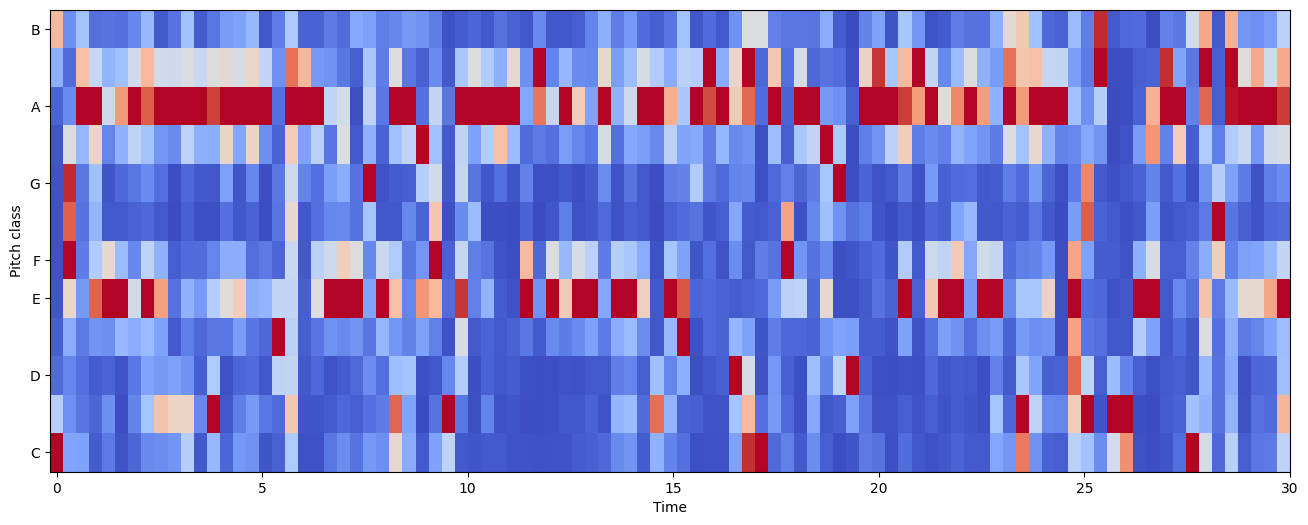

In [39]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 7000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=trim_audio, sr=sample_rate, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

## EDA

In [40]:
data = pd.read_csv("../artifacts/data/features_30_sec.csv")
data.head(4)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues


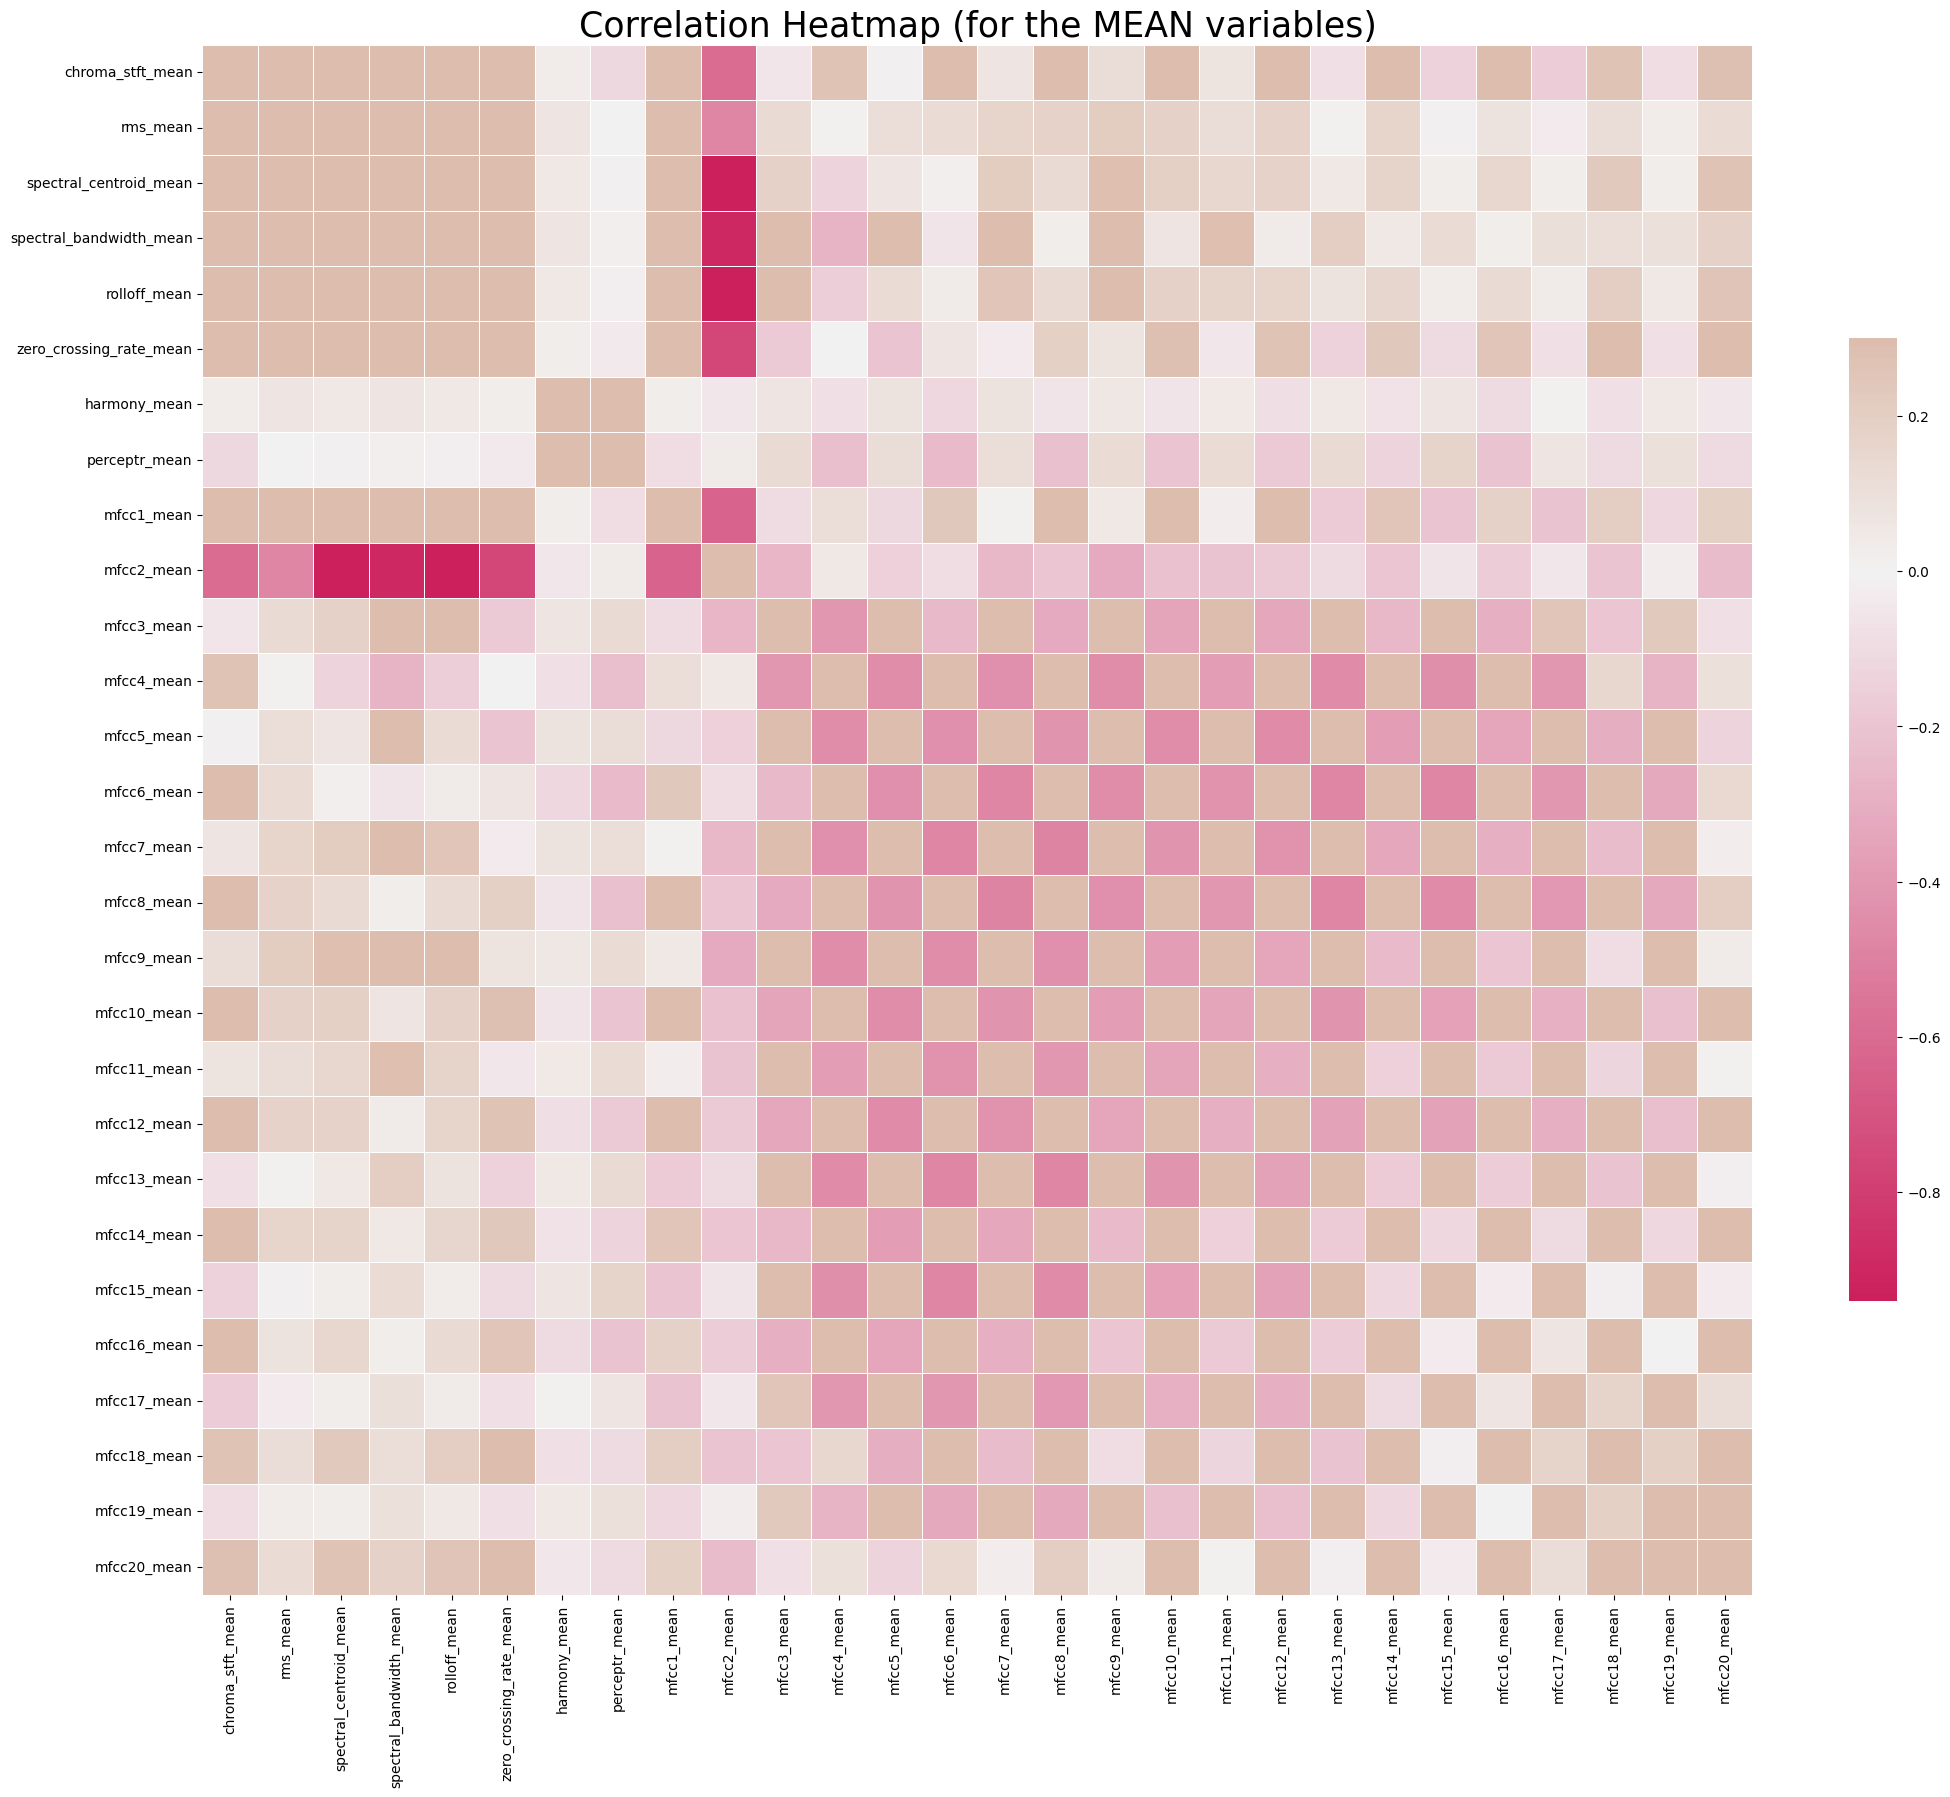

In [43]:
# Corr matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);